# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [2]:
b1 = 30.5 # slope for x
b0 = 20   # y intercept

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [3]:
sample_size = 175

We need to create a set of X (input) values. We could simply create a linear sequence...

In [4]:
x_mean = 0
x_stdev = 10
X = np.round(np.random.normal(x_mean, x_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [5]:
y = b0 + b1 * np.sin(X)

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

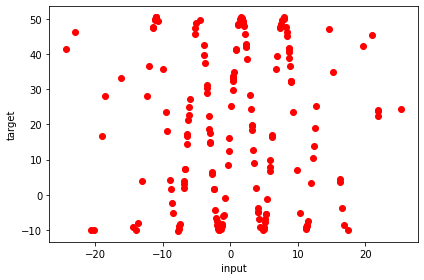

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [7]:
e_mean = 0
e_stdev = 5
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

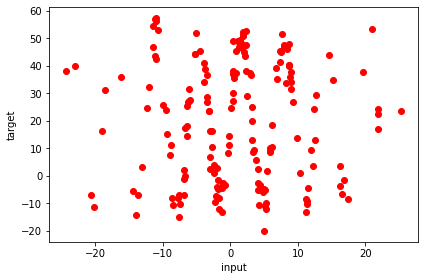

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [9]:
df = pd.DataFrame({'input': X, 'target': y})
df

,input,target
0,16.24,3.397667
1,-6.12,31.615091
2,-5.28,44.277226
3,-10.73,52.830729
4,8.65,39.736502
...,...,...
170,-6.47,14.375236
171,9.01,31.451095
172,25.28,23.605177
173,-2.49,3.813168


## Step 7: Save the data frame contents to a csv

Lastly, let's save the data we created to a csv file. This saved data will be used to practice finding hidden relationships in data.

In [10]:
df.to_csv(r'E:/Spring-23/DSP/c02_dataset_4.csv', index=False)

# Predictive Modeling Example

## Step 1: Import the libraries we will use in this notebook

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2: Load the given data that we will model

In [12]:
df = pd.read_csv(r'E:/Spring-23/DSP/c02_dataset_4.csv')

df.head(3)

,input,target
0,16.24,3.397667
1,-6.12,31.615091
2,-5.28,44.277226


Seperate out the input m(X) and the target (y)

In [13]:
X=df[['input']]
y=df[['target']]

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

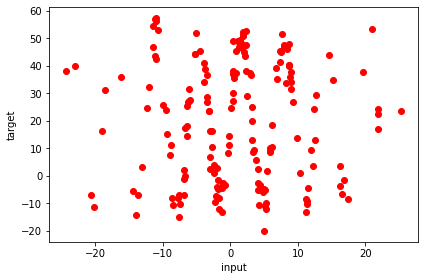

In [14]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [15]:
lin_reg = LinearRegression().fit(np.sin(X),y) # fit the model

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

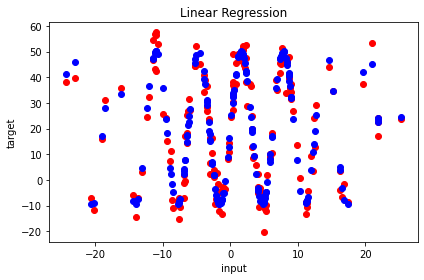

In [16]:
fig = plt.figure() # create a figure
ax = fig.add_subplot() # add a subplot

ax.scatter(X, y, color='red') # plot the actual values
ax.scatter(X,lin_reg.predict(np.sin(X)),color='blue') # plot the predicted values

ax.set_title('Linear Regression') 
ax.set_xlabel('input') 
ax.set_ylabel('target')
plt.tight_layout() # make sure the labels are not cut off
plt.show() # show the plot

In [17]:
b0 = lin_reg.intercept_[0] # get the intercept
b1 = lin_reg.coef_[0][0] # get the slope
r2 = lin_reg.score(X, y) # get the R^2
print(f"Y = {b0:.2f} + {b1:.2f}sin(x)")
print(f"R^2: {lin_reg.score(np.sin(X), y):.3f}") 

Y = 20.23 + 29.92sin(x)
R^2: 0.945


# Inference

## If I decrease the sample size i.e is no of observations the root mean squared value has been slightly decreased by 0.03% which is 0.0945
## The intercept has been increased i.e is Bo and slope value has been decreased i.e is B1
## However the error value has slightly reduced but it is not good model but when compared to the old model it is better
## Bo value of the old model was 20.14 and for the this model it is 20.23
## B1 value of the old model was 20.92 and for this model it is 20.92
## Root mean square value for the old model was 0.948 and for this model it is 0.945